<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/%EA%B3%BC%EC%A0%9C1(%EB%B6%84%EB%A5%98%EA%B8%B0_%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80_IrisData%EC%82%AC%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Decision Tree ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== Bagging ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2   

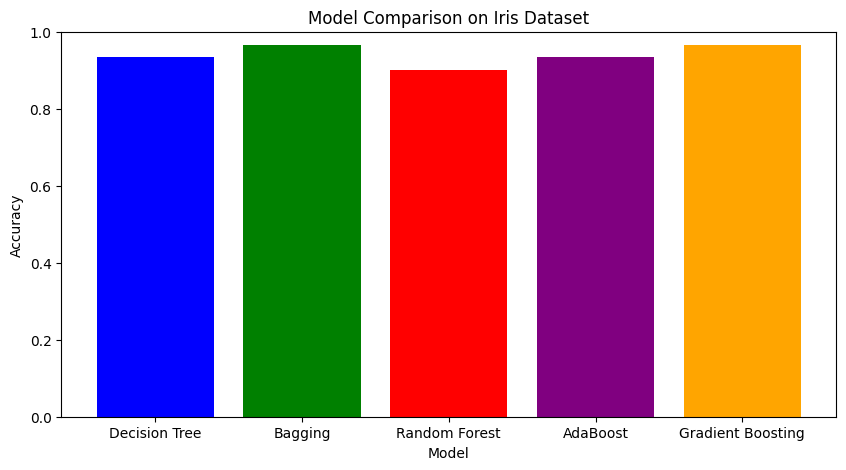

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Iris 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 모델 정의
# base_estimator를 estimator로 변경
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),  # Changed base_estimator to estimator
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # 학습
    y_pred = model.predict(X_test)  # 예측
    acc = accuracy_score(y_test, y_pred)  # 정확도 계산
    results[name] = acc
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))

# 성능 비교 시각화
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison on Iris Dataset")
plt.ylim(0, 1)
plt.show()